In [38]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("../..")
from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
dumperInput = DumperInputManager("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/")

In [48]:
def makeTracksterDf(reader):
    return ak.to_dataframe(reader.tracksters[["regressed_energy", "raw_energy", "raw_em_energy", "raw_pt", "raw_em_pt",
    "barycenter_x", "barycenter_y", "barycenter_z", "barycenter_eta", "barycenter_phi"]],
            levelname=lambda x : {0:"eventInternal", 1:"ts_id"}[x])
comp = DataframeComputation(makeTracksterDf)

In [49]:
res = runComputations([comp], dumperInput)
trackster_df = res[0]

In [50]:
trackster_df

regressed_energy  raw_energy  raw_em_energy    raw_pt  \
eventInternal ts_id                                                          
0             0              7.391006    2.742924       2.742924  1.026281   
              1             10.032842    8.259431       8.259431  1.956256   
              2              5.075555    1.343507       1.343507  0.450869   
              3              5.072914    1.804041       1.804041  0.419955   
              4              7.938035    4.901259       4.901259  0.769578   
...                               ...         ...            ...       ...   
599           2840          10.661562    7.656139       0.000000  2.187536   
              2841           5.380538    1.575616       0.000000  0.062008   
              2842           0.000000    0.914420       0.000000  0.069735   
              2843           4.532521    1.251985       0.000000  0.104781   
              2844           3.930353    1.082016       0.000000  0.326819   

                     raw_em_pt  barycenter_x  barycenter_y  barycenter_z  \
eventInternal ts_id                                                        
0             0       1.026281     58.169521      2.087366   -328.322662   
              1       1.956256     65.360550     -2.080386   -324.260864   
              2       0.450869    -29.800722     -4.274902   -324.319244   
              3       0.419955    -22.865479      7.588108   -323.196899   
              4       0.769578    -49.962391     15.746107   -326.943115   
...                        ...           ...           ...           ...   
599           2840    0.000000   -158.128433   -146.131134    442.303528   
              2841    0.000000      7.246070    -56.217537    461.490295   
              2842    0.000000    -53.007980    -30.145483    459.767365   
              2843    0.000000     33.857201    -44.250671    468.695831   
              2844    0.000000     57.794914    -98.034210    512.400757   

                     barycenter_eta  barycenter_phi  
eventInternal ts_id                                  
0             0           -2.430907        0.035869  
              1           -2.304286       -0.031819  
              2           -3.072303       -2.999115  
              3           -3.290924        2.821170  
              4           -2.530671        2.836287  
...                             ...             ...  
599           2840         1.467638       -2.395605  
              2841         2.793891       -1.442610  
              2842         2.717686       -2.624508  
              2843         2.826323       -0.917687  
              2844         2.209901       -1.038105  

[2096158 rows x 10 columns]

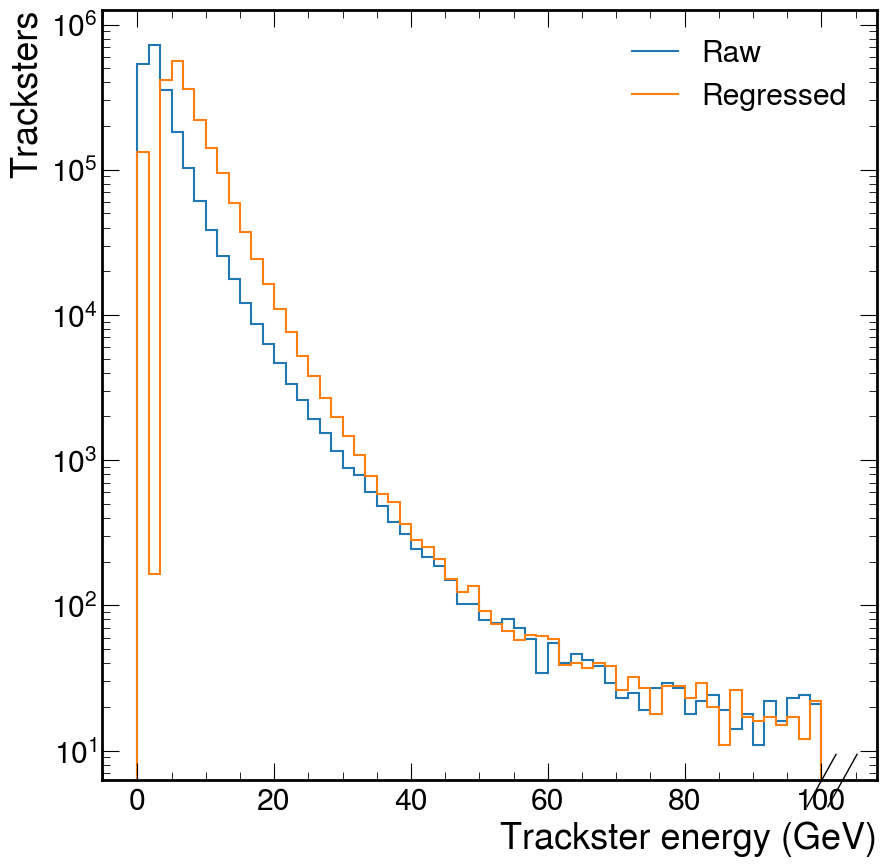

In [47]:
nbins = 60
h_rawEn = hist.Hist(hist.axis.Regular(nbins, 0, 100, name="raw_energy", label="Trackster raw energy (GeV)"))
h_rawEn.fill(trackster_df.raw_energy)

h_regressedEnergy = hist.Hist(hist.axis.Regular(nbins, 0, 100, name="regressed_energy", label="Trackster regressed energy (GeV)"))
h_regressedEnergy.fill(trackster_df.regressed_energy)

hep.histplot([h_rawEn, h_regressedEnergy], yerr=False, label=["Raw", "Regressed"])
plt.ylabel("Tracksters")
plt.xlabel("Trackster energy (GeV)")
plt.yscale("log")
plt.legend()